In [193]:
def find_elevmet(scenario,dataname,swelist,elevation):
    if (scenario == "historical"): 
        elevmet = elevation
        cr = 'r'
    elif (scenario == "rcp85") and (dataname == "swe_2010_2039"):
        elevmet = elevation - offset
        cr = 'g'
    elif (scenario == "rcp45") and (dataname == "swe_2010_2039"):
        elevmet = elevation - offset
        cr = 'g'
    elif (scenario == "rcp85") and (dataname == "swe_2040_2069"):
        elevmet = elevation - offset*2
        cr = 'b'
    elif (scenario == "rcp45") and (dataname == "swe_2040_2069"):
        elevmet = elevation - offset*2
        cr = 'b'
    elif (scenario == "rcp85") and (dataname == "swe_2070_2099"): 
        elevmet = elevation - offset*3 
        cr = 'm'
    elif (scenario == "rcp45") and (dataname == "swe_2070_2099"): 
        elevmet = elevation - offset*3 
        cr = 'm'
    else: 
        print('yay Bernie Sanders')
    return(elevmet,cr)

In [194]:
def make_swelists(basin,scenario,dataname):  
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,scenario)
    data = np.load(file)
    swe = data[dataname]
    lats = data['lats']
    lons = data['lons']
    swe_500 = list()
    swe_1000 = list()
    swe_1500 = list()
    swe_2000 = list()
    swe_2500 = list()
    swe_3000 = list()
    swe_3500 = list() 
    swe_4000 = list()
    count = 0
    for lat,lon in zip(lats,lons): 
        elev = get_elev_for_lat_lon(elev_corr_info,lat,lon) 
        if elev > 0 and elev <= 750:
            swe_500.append(swe[count]) 
        elif elev > 750 and elev <= 1250:
            swe_1000.append(swe[count])
        elif elev > 1250 and elev <= 1750:
            swe_1500.append(swe[count])
        elif elev > 1750 and elev <= 2250:
            swe_2000.append(swe[count])
        elif elev > 2250 and elev <= 2750:
            swe_2500.append(swe[count])
        elif elev > 2750 and elev <= 3250:
            swe_3000.append(swe[count]) 
        elif elev > 3250 and elev <= 3750:
            swe_3500.append(swe[count])
        else: 
            swe_4000.append(swe[count]) 
        count += 1
    return(swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000)

In [195]:
def swe_stats(swe_array):
    meanswe = np.mean(swe_array)
    minswe = np.min(swe_array)
    maxswe = np.max(swe_array)
    swe10 = np.percentile(swe_array,10)
    swe90 = np.percentile(swe_array,90) 
    ## minimum range
    xmin = np.arange(minswe,swe10,1)
    ## maximum range
    xmax = np.arange(swe90,maxswe,1)
    ## 10-90 range
    xmid = np.arange(swe10,swe90,1)
    return(meanswe,minswe,maxswe,swe10,swe90,xmin,xmax,xmid)

In [196]:
import sys
import os
import numpy as np
import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from snowpack_functions import get_elev_for_lat_lon,import_gridcell_elevation
# basins = ["cascades","california","northernrockies","whites","southernrockies"]
basins = ["whites"]
scenarios = ["historical","rcp45","rcp45","rcp45","historical","rcp85","rcp85","rcp85"] 
datanames = ['swe','swe_2010_2039','swe_2040_2069','swe_2070_2099','swe','swe_2010_2039','swe_2040_2069','swe_2070_2099']
lw = 2.0
offset = 60
soil_file = '/raid9/gergel/agg_snowpack/soil_avail.txt'
elev_corr_info  = import_gridcell_elevation(soil_file)

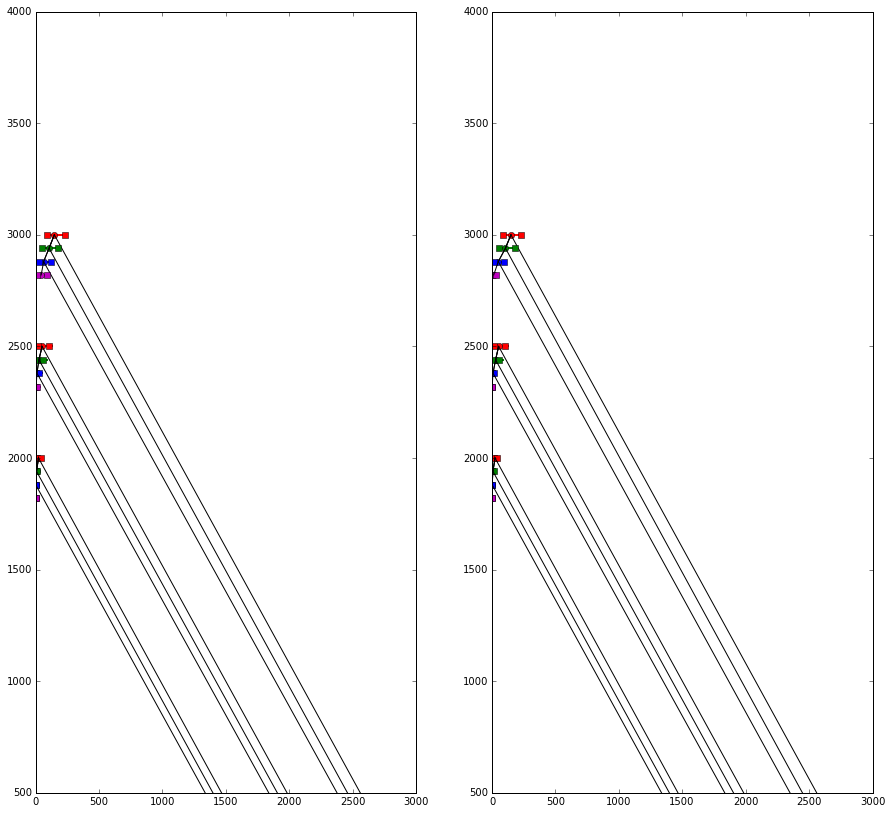

In [197]:
fig = plt.figure(figsize=(15,14))
basin = 'whites'
elev_conn = np.ndarray(shape=(8,8),dtype='float') ## [rows: scenarios, columns: elevations]
swe_conn = np.ndarray(shape=(8,8),dtype='float')
nn = 0.001
for scennum in np.arange(4): 
    ax = fig.add_subplot(1,2,1)
    scenario = scenarios[scennum]
    dataname = datanames[scennum]
    swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000  = make_swelists(basin,scenario,dataname)                                                                   
    swees = [swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000]
    elevations = [500,1000,1500,2000,2500,3000,3500,4000]
    for swenum in np.arange(len(elevations)): 
        elevation = elevations[swenum]
        swe_array = np.asarray(swees[swenum])
        if len(swees[swenum]) > 0:
            ## y value
            elevmet,cr = find_elevmet(scenario,dataname,swe_array,elevation)
            meanswe,minswe,maxswe,swe10,swe90,xmin,xmax,xmid = swe_stats(swe_array)

            ax.plot(xmin,np.ones(len(xmin))*elevmet,color=cr,linestyle='--',linewidth=lw)
            ax.plot(xmax,np.ones(len(xmax))*elevmet,color=cr,linestyle='--',linewidth=lw) 
            ax.plot(xmid,np.ones(len(xmid))*elevmet,color=cr,linestyle='-',linewidth=lw) 
            ax.plot(meanswe,elevmet,'o',color=cr) 
            ax.plot(swe10,elevmet,'s',color=cr)
            ax.plot(swe90,elevmet,'s',color=cr)
            elev_conn[scennum,swenum] = elevmet
            swe_conn[scennum,swenum] = meanswe
            ax.set_ylim((500,4000))
    for elv in np.arange(len(elevations)): 
        elevmeansorted = elev_conn[0:4,elv]
        swemeansorted = swe_conn[0:4,elv]
        if np.sum(elevmeansorted) > 0:
            ax.plot(swemeansorted[swemeansorted > nn],elevmeansorted[swemeansorted > nn],'k-')
for scennum in np.arange(4,8): 
    ax1 = fig.add_subplot(1,2,2)
    scenario = scenarios[scennum]
    dataname = datanames[scennum]
    swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000  = make_swelists(basin,scenario,dataname)                                                                   
    swees = [swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000]
    elevations = [500,1000,1500,2000,2500,3000,3500,4000]
    for swenum in np.arange(len(elevations)): 
        elevation = elevations[swenum]
        swe_array = np.asarray(swees[swenum])
        if len(swees[swenum]) > 0:
            ## y value
            elevmet,cr = find_elevmet(scenario,dataname,swe_array,elevation)
            meanswe,minswe,maxswe,swe10,swe90,xmin,xmax,xmid = swe_stats(swe_array)

            ax1.plot(xmin,np.ones(len(xmin))*elevmet,color=cr,linestyle='--',linewidth=lw)
            ax1.plot(xmax,np.ones(len(xmax))*elevmet,color=cr,linestyle='--',linewidth=lw) 
            ax1.plot(xmid,np.ones(len(xmid))*elevmet,color=cr,linestyle='-',linewidth=lw) 
            ax1.plot(meanswe,elevmet,'o',color=cr) 
            ax1.plot(swe10,elevmet,'s',color=cr)
            ax1.plot(swe90,elevmet,'s',color=cr)
            elev_conn[scennum,swenum] = elevmet
            swe_conn[scennum,swenum] = meanswe
        ax1.set_ylim((500,4000))
    for elv in np.arange(len(elevations)): 
        elevmeansorted = elev_conn[4:8,elv]
        swemeansorted = swe_conn[4:8,elv]
        if np.sum(elevmeansorted) > 0: 
            ax1.plot(swemeansorted[swemeansorted > nn],elevmeansorted[swemeansorted > nn],'k-')

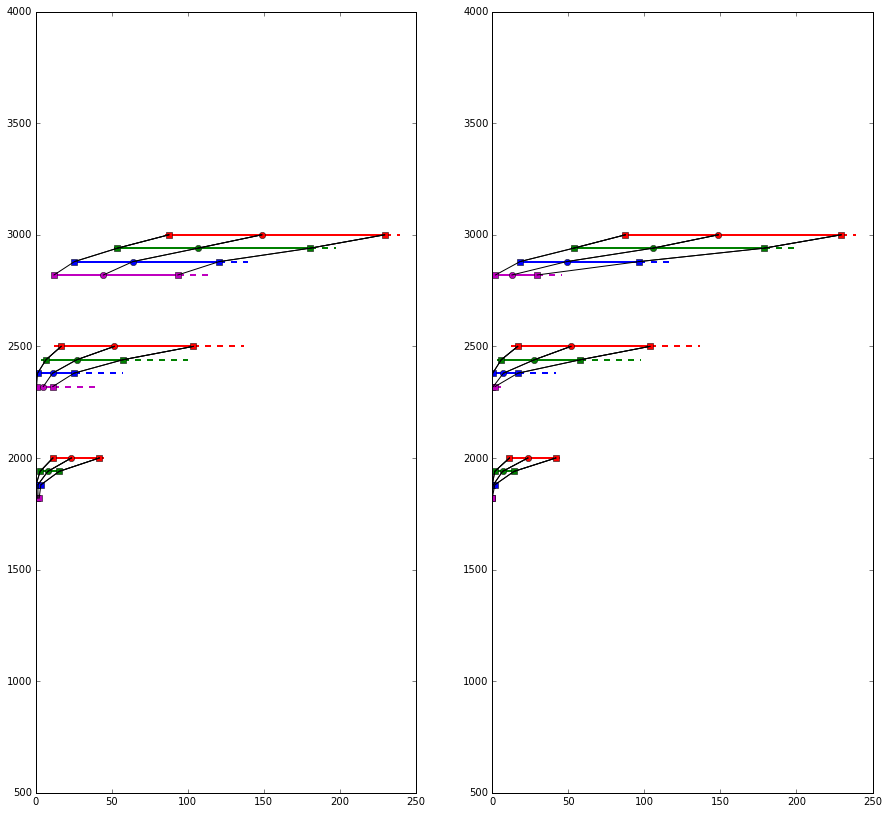

In [200]:
fig = plt.figure(figsize=(15,14))
basin = 'whites'
elev_conn = np.ndarray(shape=(3,8,8),dtype='float') ## [rows: scenarios, columns: elevations]
swe_conn = np.ndarray(shape=(3,8,8),dtype='float')
nn = 0.01
scens = ['rcp45','rcp85']
for scenn in scens: 
    if (scenn == 'rcp45'):
        lop = np.arange(4)
        ax = fig.add_subplot(1,2,1)
        row = 0
        col = 4
    else: 
        lop = np.arange(4,8)
        ax = fig.add_subplot(1,2,2)
        row = 4
        col = 8
    for scennum in lop: 
        scenario = scenarios[scennum]
        dataname = datanames[scennum]
        swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000  = make_swelists(basin,scenario,dataname)                                                                   
        swees = [swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000]
        elevations = [500,1000,1500,2000,2500,3000,3500,4000]
        for swenum in np.arange(len(elevations)): 
            elevation = elevations[swenum]
            swe_array = np.asarray(swees[swenum])
            if len(swees[swenum]) > 0:
                ## y value
                elevmet,cr = find_elevmet(scenario,dataname,swe_array,elevation)
                meanswe,minswe,maxswe,swe10,swe90,xmin,xmax,xmid = swe_stats(swe_array)
                ax.plot(xmin,np.ones(len(xmin))*elevmet,color=cr,linestyle='--',linewidth=lw)
                ax.plot(xmax,np.ones(len(xmax))*elevmet,color=cr,linestyle='--',linewidth=lw) 
                ax.plot(xmid,np.ones(len(xmid))*elevmet,color=cr,linestyle='-',linewidth=lw) 
                ax.plot(meanswe,elevmet,'o',color=cr) 
                ax.plot(swe10,elevmet,'s',color=cr)
                ax.plot(swe90,elevmet,'s',color=cr)
                elev_conn[0,scennum,swenum] = elevmet
                elev_conn[1,scennum,swenum] = elevmet
                elev_conn[2,scennum,swenum] = elevmet
                swe_conn[0,scennum,swenum] = meanswe
                swe_conn[1,scennum,swenum] = swe10
                swe_conn[2,scennum,swenum] = swe90
                ax.set_ylim((500,4000))
        for elv in np.arange(len(elevations)): 
            elevmeansorted = elev_conn[0,row:col,elv]
            swemeansorted = swe_conn[0,row:col,elv]
            elevminsorted = elev_conn[1,row:col,elv]
            sweminsorted = swe_conn[1,row:col,elv]
            elevmaxsorted = elev_conn[2,row:col,elv]
            swemaxsorted = swe_conn[2,row:col,elv]
            if np.sum(elevmeansorted) > 1:
                ax.plot(swemeansorted[swemeansorted > nn],elevmeansorted[swemeansorted > nn],'k-')
                ax.plot(sweminsorted[swemeansorted > nn],elevminsorted[swemeansorted > nn],'k-')
                ax.plot(swemaxsorted[sweminsorted > nn],elevmaxsorted[sweminsorted > nn],'k-')

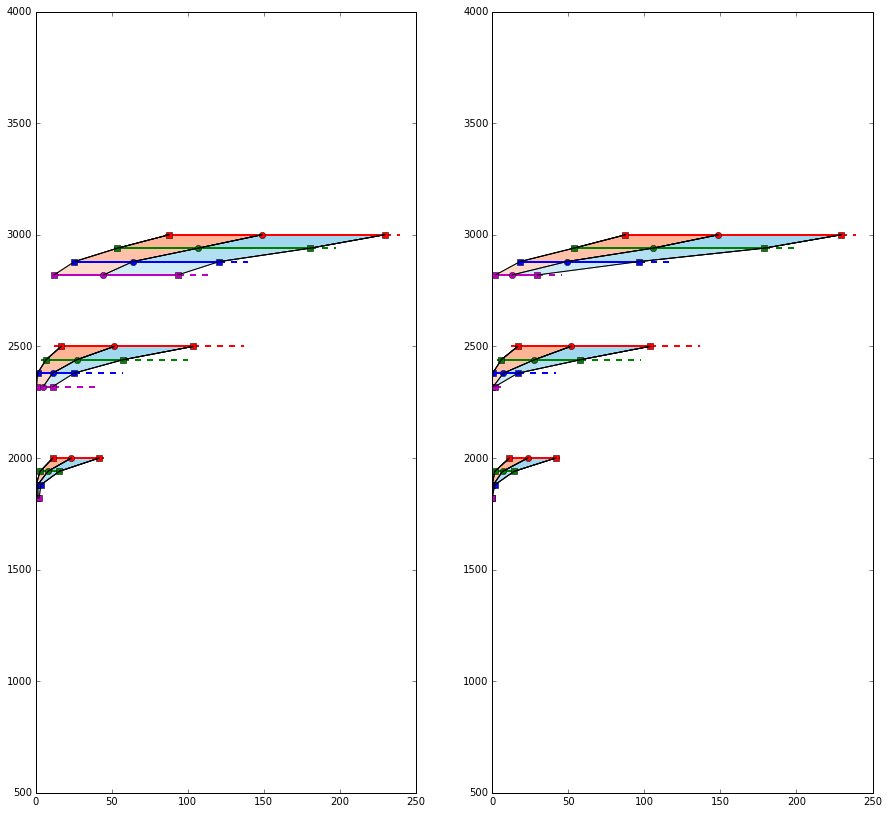

In [205]:
fig = plt.figure(figsize=(15,14))
basin = 'whites'
elev_conn = np.ndarray(shape=(3,8,8),dtype='float') ## [rows: scenarios, columns: elevations]
swe_conn = np.ndarray(shape=(3,8,8),dtype='float')
nn = 0.01
scens = ['rcp45','rcp85']
for scenn in scens: 
    if (scenn == 'rcp45'):
        lop = np.arange(4)
        ax = fig.add_subplot(1,2,1)
        row = 0
        col = 4
    else: 
        lop = np.arange(4,8)
        ax = fig.add_subplot(1,2,2)
        row = 4
        col = 8
    for scennum in lop: 
        scenario = scenarios[scennum]
        dataname = datanames[scennum]
        swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000  = make_swelists(basin,scenario,dataname)                                                                   
        swees = [swe_500,swe_1000,swe_1500,swe_2000,swe_2500,swe_3000,swe_3500,swe_4000]
        elevations = [500,1000,1500,2000,2500,3000,3500,4000]
        for swenum in np.arange(len(elevations)): 
            elevation = elevations[swenum]
            swe_array = np.asarray(swees[swenum])
            if len(swees[swenum]) > 0:
                ## y value
                elevmet,cr = find_elevmet(scenario,dataname,swe_array,elevation)
                meanswe,minswe,maxswe,swe10,swe90,xmin,xmax,xmid = swe_stats(swe_array)
                ax.plot(xmin,np.ones(len(xmin))*elevmet,color=cr,linestyle='--',linewidth=lw)
                ax.plot(xmax,np.ones(len(xmax))*elevmet,color=cr,linestyle='--',linewidth=lw) 
                ax.plot(xmid,np.ones(len(xmid))*elevmet,color=cr,linestyle='-',linewidth=lw) 
                ax.plot(meanswe,elevmet,'o',color=cr) 
                ax.plot(swe10,elevmet,'s',color=cr)
                ax.plot(swe90,elevmet,'s',color=cr)
                elev_conn[0,scennum,swenum] = elevmet
                elev_conn[1,scennum,swenum] = elevmet
                elev_conn[2,scennum,swenum] = elevmet
                swe_conn[0,scennum,swenum] = meanswe
                swe_conn[1,scennum,swenum] = swe10
                swe_conn[2,scennum,swenum] = swe90
                ax.set_ylim((500,4000))
        for elv in np.arange(len(elevations)): 
            elevmeansorted = elev_conn[0,row:col,elv]
            swemeansorted = swe_conn[0,row:col,elv]
            elevminsorted = elev_conn[1,row:col,elv]
            sweminsorted = swe_conn[1,row:col,elv]
            elevmaxsorted = elev_conn[2,row:col,elv]
            swemaxsorted = swe_conn[2,row:col,elv]
            if np.sum(elevmeansorted) > 1:
                ax.plot(swemeansorted[swemeansorted > nn],elevmeansorted[swemeansorted > nn],'k-')
                ax.plot(sweminsorted[swemeansorted > nn],elevminsorted[swemeansorted > nn],'k-')
                ax.plot(swemaxsorted[sweminsorted > nn],elevmaxsorted[sweminsorted > nn],'k-')
                ax.fill_betweenx(elevminsorted[swemeansorted > nn],swemeansorted[swemeansorted > nn], 
                                 sweminsorted[swemeansorted > nn], facecolor='lightsalmon',alpha=0.4)
                ax.fill_betweenx(elevminsorted[swemeansorted > nn],swemeansorted[swemeansorted > nn], 
                                 swemaxsorted[swemeansorted > nn], facecolor='skyblue',alpha=0.4)